In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [2]:
tickers = ["PG", "MSFT", "F", "GE"]

securities_data = pd.DataFrame()

for ticker in tickers:
    securities_data[ticker] = web.DataReader(ticker, data_source="yahoo", start="1995-1-1")["Adj Close"]

In [4]:
securities_data.info()
# checks the data healthness

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6441 entries, 1995-01-03 to 2020-07-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6441 non-null   float64
 1   MSFT    6441 non-null   float64
 2   F       6441 non-null   float64
 3   GE      6441 non-null   float64
dtypes: float64(4)
memory usage: 251.6 KB


In [5]:
securities_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.280613,2.406834,3.262354,2.725145
1995-01-04,6.230266,2.424330,3.350130,2.725145
1995-01-05,6.142162,2.384342,3.320871,2.731823
1995-01-06,6.154748,2.424330,3.320871,2.718464
1995-01-09,6.129573,2.409335,3.379390,2.691748


In [6]:
securities_data.tail()

,PG,MSFT,F,GE
Date,,,,
2020-07-27,126.320000,203.850006,6.93,6.71
2020-07-28,127.879997,202.020004,7.01,6.89
2020-07-29,128.309998,204.059998,6.92,6.59
2020-07-30,131.419998,203.899994,6.74,6.26
2020-07-31,131.119995,205.009995,6.61,6.07


In [7]:
securities_data.iloc[0]
# the iloc[0] indexer extracts the data from the first column of the table

PG      6.280613
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

In [14]:
securities_data.loc["2020-07-31"]
# the loc["2020-07-31"] indexer extracts the data from the given data of the table
# the precise indicating label must be provided (e.g. "2020-07-31")

PG      131.119995
MSFT    205.009995
F         6.610000
GE        6.070000
Name: 2020-07-31 00:00:00, dtype: float64

### Normalization to 100:

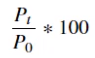

The idea of normalization is to compare the behavior of the four different stocks as if they all have started from the same value (100 in this case)

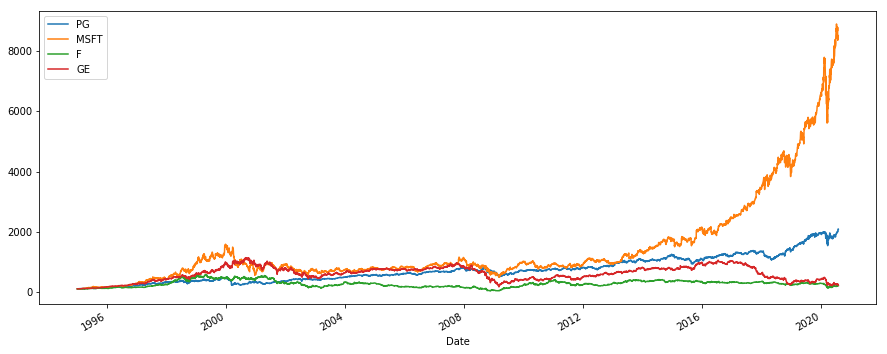

In [12]:
(securities_data / securities_data.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

### Without the Normalization 

Otherwise the adjusted closing prices of all companies will be plotted directly, providing a not good landmark

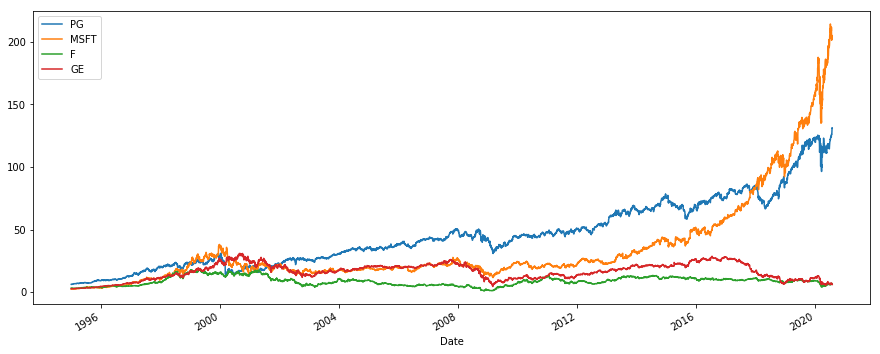

In [13]:
securities_data.plot(figsize = (15,6));
plt.show()

## Calculating the return of a portfolio of securities

In [15]:
portfolio_return = (securities_data / securities_data.shift(1)) - 1
portfolio_return.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [18]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
# the weights must to have the total amount of 1 when summed up

In [20]:
np.dot(portfolio_return, weights)
# Numpy's dot method allows to calculate vector or matrix prodcuts straight away

array([        nan,  0.00653969, -0.00922972, ..., -0.01072991,
       -0.01315835, -0.01161954])

## Calculates the annual return of the portfolio of securities

### Step 1

In [21]:
annual_portfolio_return = portfolio_return.mean() * 250

print(annual_portfolio_return)

PG      0.143874
MSFT    0.222607
F       0.107458
GE      0.081900
dtype: float64


### Step 2

In [22]:
np.dot(annual_portfolio_return, weights)

0.1389597217701586

In [23]:
portfolio_1 = round(np.dot(annual_portfolio_return, weights), 5) * 100

In [25]:
print(f"Portfolio 1 annual return is {portfolio_1} %")

Portfolio 1 annual return is 13.896 %


### Example for a different weight of portfolios

In [28]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [30]:
portfolio_2 = round(np.dot(annual_portfolio_return, weights_2), 5) * 100

print(f"Portfolio 2 annual return is {portfolio_2} %")

Portfolio 1 annual return is 16.681 %


In [31]:
print("---------------------------------------------")
print(f"Portfolio 1 annual return is {portfolio_1} %")
print("---------------------------------------------")
print(f"Portfolio 2 annual return is {portfolio_2} %")
print("---------------------------------------------")

---------------------------------------------
Portfolio 1 annual return is 13.896 %
---------------------------------------------
Portfolio 2 annual return is 16.681 %
---------------------------------------------
